http://psh01com1hcom02:8885/tree?token=6b16ccaa3c414baf40fefa8b99b56a0132cb81aae64d0542

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn

run_output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/transformer_testing_output"

time_stamp_dfs = {"training_log" : None}
run_loss_dataframes = {}
for sub in os.listdir(run_output_dir):
    subpath = os.path.join(run_output_dir, sub)
    if sub.startswith("model_training") and os.path.isdir(subpath) and len(os.listdir(subpath)) > 0:
        time_stamp = "_".join([i for i in sub.split("_")[2:]])
        print(time_stamp)
        time_stamp_dfs[time_stamp] = {}
        
        training_log_file = os.path.join(subpath, "training_log.csv")
        if os.path.isfile(training_log_file):
            training_log_df = pd.read_csv(training_log_file, header=0, index_col=0)
            # print(training_log_df.head())
            
            
            time_stamp_dfs[time_stamp]["training_log"] = training_log_df
            
best_model_path = os.path.join(run_output_dir, "best_model_0.82_corr/training_log.csv")
best_model_df = pd.read_csv(best_model_path, header=0, index_col=0)
            


26_09_20_23_17
26_09_20_18_56
27_09_09_33_43
26_09_17_20_38
26_09_17_27_03
26_09_17_08_48


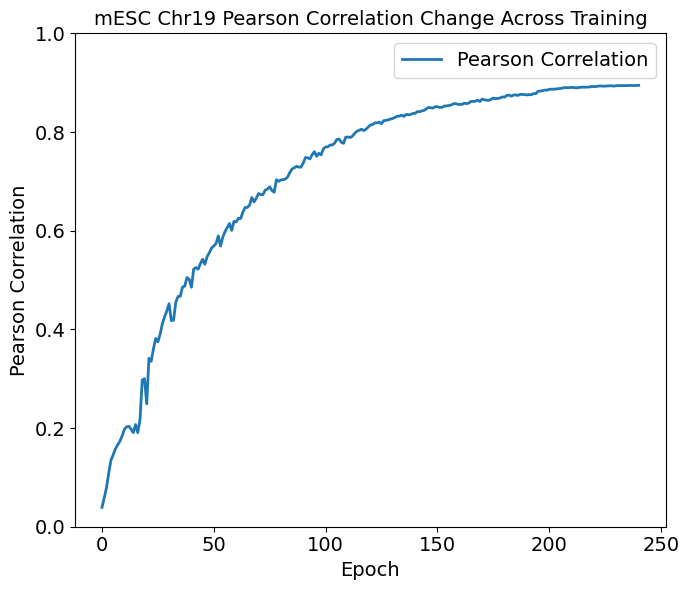

In [3]:
def plot_pearson_corr_across_epochs(df):
    fig = plt.figure(figsize=(7, 6))
    plt.plot(df.index, df["Pearson"], linewidth=2, label="Pearson Correlation")

    plt.title("mESC Chr19 Pearson Correlation Change Across Training", fontsize=14)
    plt.ylim((0,1))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Pearson Correlation", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    
    return fig

# df = time_stamp_dfs["25_09_13_48_09"]["training_log"]
df = best_model_df
fig = plot_pearson_corr_across_epochs(df)
fig.show()

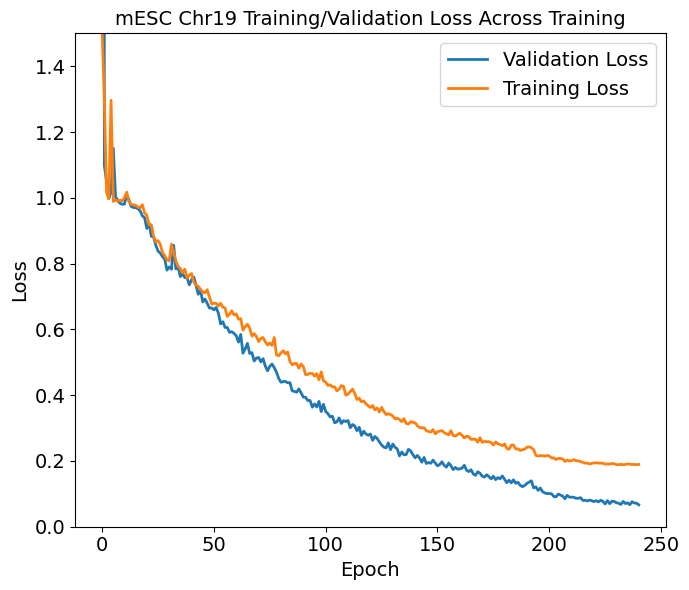

In [6]:
def plot_train_val_loss(df):
    fig = plt.figure(figsize=(7, 6))
    plt.plot(df.index, df["Train Loss"], linewidth=2, label="Validation Loss")
    plt.plot(df.index, df["Val Loss"], linewidth=2, label="Training Loss")

    plt.title("mESC Chr19 Training/Validation Loss Across Training", fontsize=14)
    plt.ylim((0,1.5))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    
    return fig
    
fig = plot_train_val_loss(df)
fig.show()

<BarContainer object of 50 artists>

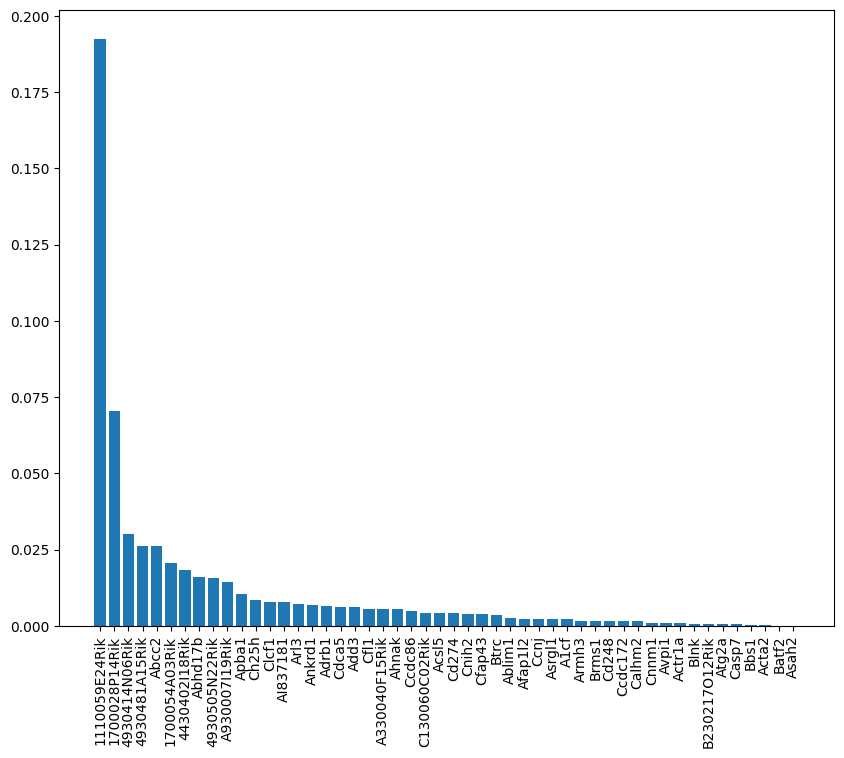

In [67]:
tf_imp_dir = os.path.join(run_output_dir, "best_model_0.82_corr/tf_gradient_attributions")
            
tf_importance_df = pd.read_csv(os.path.join(tf_imp_dir, "tf_importance_matrix_exp.csv"), header=0, index_col=0)

fig = plt.figure(figsize=(10,8))

selected_tf_row = tf_importance_df.loc["Amyb"]
selected_tf_row = selected_tf_row.iloc[:50].sort_values(ascending=False)

plt.xticks(rotation=90, fontsize=10)
plt.bar(x=selected_tf_row.index, height=selected_tf_row)


In [71]:
all_cols = pd.read_csv("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/input/DS011_mESC/10X_raw_data/DS011_PMID35977485_MOUSE_ESC/scATAC_PeakMatrix.HIFLR.txt", sep="\t", nrows=10).columns[1:]
print(all_cols[10])

AAACAGCCATTGCAGC.1


In [72]:
homer_df = pd.read_parquet("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/transformer_testing_output/homer_tf_to_peak.parquet", engine="pyarrow")


In [77]:
homer_tfs = homer_df["source_id"].unique()

print(list(homer_tfs))

import pickle

with open("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/dev/transformer/mesc_homer_tfs.pkl", "wb") as f:
    pickle.dump(homer_tfs, f)

['AMYB', 'AP-1', 'Atoh1', 'HNF4a', 'HNF6', 'HOXA1', 'HOXA2', 'HOXA3', 'HOXB13', 'Hand2', 'Hnf1', 'Hnf6b', 'Hoxa9', 'Atoh7', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxb4', 'Hoxc6', 'Hoxc9', 'Hoxc10', 'Hoxc13', 'Hoxd9', 'Hoxd10', 'BATF', 'Hoxd11', 'Hoxd12', 'Hoxd13', 'Isl1', 'Jun-AP1', 'JunB', 'JunD', 'KLF1', 'KLF3', 'KLF5', 'BHLHA15', 'KLF6', 'KLF10', 'KLF14', 'KLF17', 'Klf4', 'Klf9', 'Klf15', 'LEF1', 'LHX9', 'Lhx1', 'BMYB', 'Lhx2', 'Lhx3', 'Lhx6', 'MITF', 'MYB', 'MafA', 'MafB', 'MafK', 'Maz', 'Mef2d', 'BORIS', 'Meis1', 'Mesp1', 'Mixl1', 'Myf5', 'MyoD', 'MyoG', 'NF-E2', 'NFE2L2', 'NFIL3', 'NFY', 'Bach1', 'NFkB-p65-Rel', 'Nanog', 'NeuroD1', 'NeuroG2', 'Nkx6.1', 'Nrf2', 'Nur77', 'OCT4-SOX2-TCF-NANOG', 'OCT', 'Oct2', 'Bach2', 'Oct4', 'Oct6', 'Oct11', 'Olig2', 'PAX5', 'PBX1', 'PBX2', 'PPARE', 'Barx1', 'PPARa', 'PU.1', 'Pax8', 'Pbx3', 'Pdx1', 'Phox2a', 'Phox2b', 'Pitx1', 'Pknox1', 'REST-NRSF', 'Bcl11a', 'RFX', 'RUNX2', 'RUNX-AML', 'RUNX', 'RXR', 'Rbpj1', 'Rfx1', 'Rfx2', 'Rfx5', 'Rfx6', 'AP-2alpha', 